In [1]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import t

In [136]:
def compute_packet_error_rate(sent_packets_cnt, remote_received_packets_cnt):
    return (sent_packets_cnt - remote_received_packets_cnt) * 100.0 / sent_packets_cnt

def plot_catplot(data, env, title):
    data_by_location = data[data["location"] == env]
    g = sns.catplot(x="distance_cm", y="packet_error_rate", hue="node_count", col="ping_interval", data=data_by_location, kind="point", ci=68)
    g.figure.subplots_adjust(top=0.8)
    g.figure.suptitle(title)

In [155]:
data = pd.read_csv("results.csv")

In [89]:
std_results= []
data["packet_error_rate"] = compute_packet_error_rate(data["local_sent_packets"], data["remote_received_packets"])
for node in pd.unique(data["node_count"]):
    data_node = data[data["node_count"] == node]
    for env in pd.unique(data_node["location"]):
        data_env = data_node[data_node["location"] == env]
        for interval in pd.unique(data_env["ping_interval"]):
            data_interval = data_env[data_env["ping_interval"] == interval]
            for distance in pd.unique(data_interval["distance_cm"]):
                data_distance = data_interval[data_interval["distance_cm"] == distance]
                stats = data_distance["packet_error_rate"]
                stats_mean = stats.mean()
                stats_std = stats.std()
                std_results.append({"node": node, "env": env, "interval_ms": interval, "distance_cm": distance, "mean_per": stats_mean, "CI": stats_std})
                # print(f"node={node}@{env} {interval}ms {distance}cm mean={stats_mean} std={stats_std}")
df_results = pd.DataFrame(std_results)
df_results.tail()

,node,env,interval_ms,distance_cm,mean_per,CI
180,2,city,2100,800,4.444444,16.850834
181,2,city,2100,10000,17.777778,32.010801
182,2,city,2100,13000,8.888889,27.666444
183,2,city,2100,16000,-4.444444,14.907120
184,2,city,2100,21000,46.666667,44.721360


/tmp/ipykernel_8329/662190759.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<AxesSubplot:xlabel='distance_cm', ylabel='mean_per'>

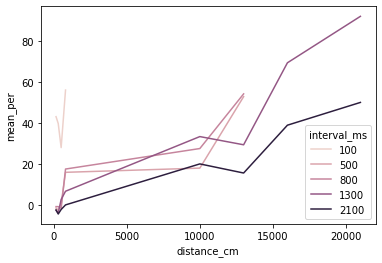

In [119]:
data_city = df_results[df_results["env"] == "city"]
data_forest = df_results[df_results["env"] == "forest"]
data_ground_truth = df_results[df_results["env"] == "ground_truth"]
data_forest_n2 = data_forest[df_results["node"] == 2]

# f = sns.relplot(data=data_forest_n2.pivot("distance_cm", "interval_ms", "mean_per"), kind="line", markers=True)
# f.set_titles("Forest, 2 nodes")
# import matplotlib.pyplot as plt
# g = sns.FacetGrid(data_forest_n2, col="interval_ms")
# g.map(plt.errorbar, "distance_cm", "mean_per", "std_per", marker="o")

# sns.catplot(x="distance_cm", y="mean_per", hue="interval_ms", data=data_forest_n2, col="interval_ms", kind="point")
sns.lineplot(x="distance_cm", y="mean_per", hue="interval_ms", data=data_forest_n2, markers=True)

In [108]:
data.tail()

,node_count,ping_interval,distance_cm,local_sent_packets,remote_received_packets,location,packet_error_rate
955,2,2100,21000,9,9,city,0.000000
956,2,2100,21000,9,1,city,88.888889
957,2,2100,21000,9,0,city,100.000000
958,2,2100,21000,9,7,city,22.222222
959,2,2100,21000,9,7,city,22.222222


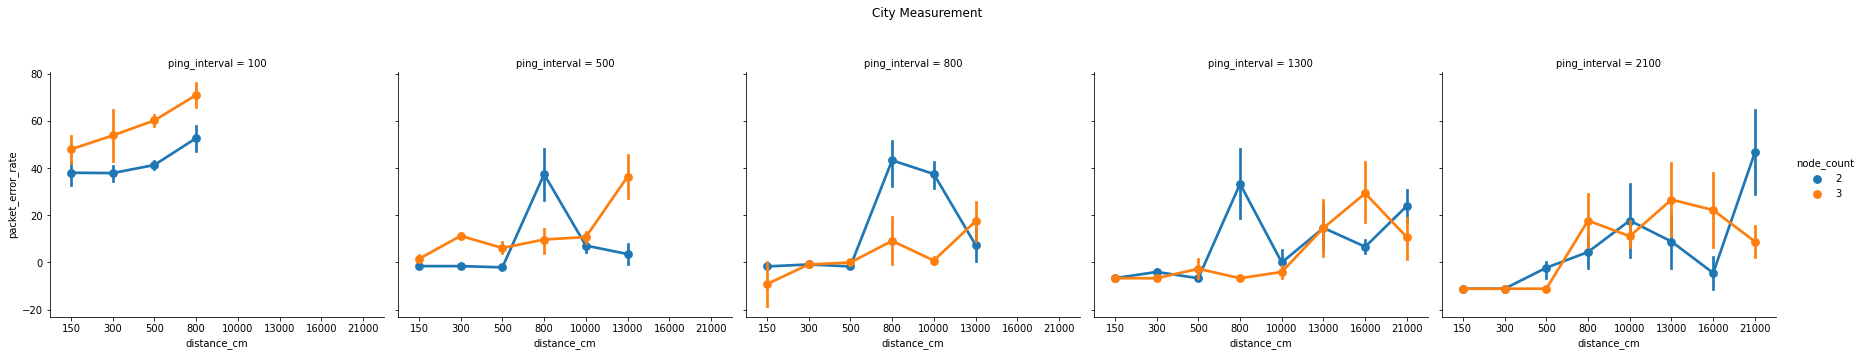

In [138]:
plot_catplot(data, "city", "City Measurement")

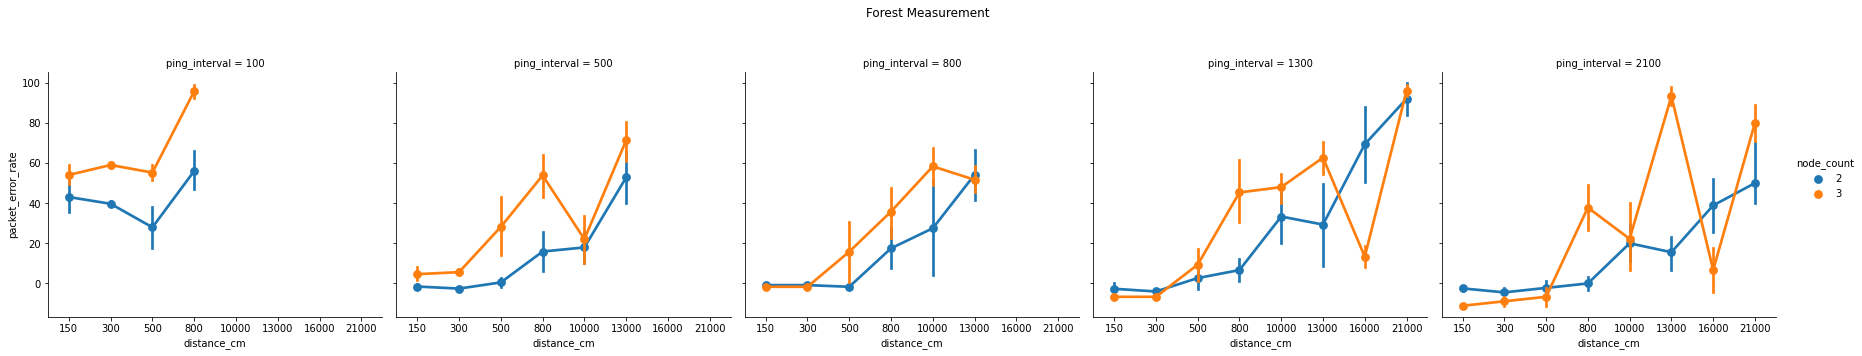

In [140]:
plot_catplot(data, "forest", "Forest Measurement")

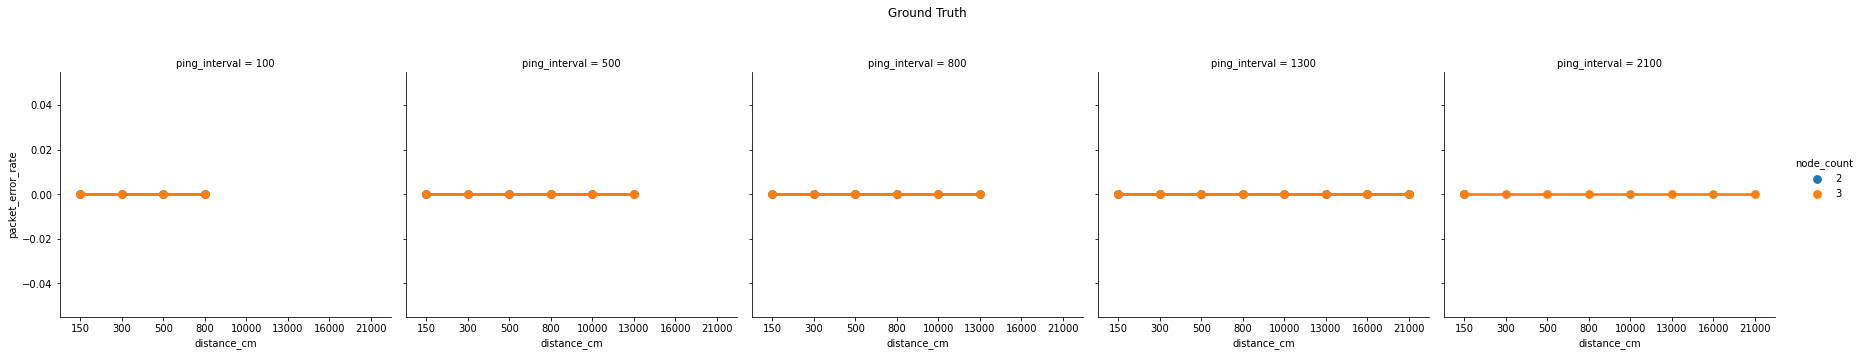

In [142]:
plot_catplot(data, "ground_truth", "Ground Truth")

Text(0.5, 0.98, '@1300ms ping')

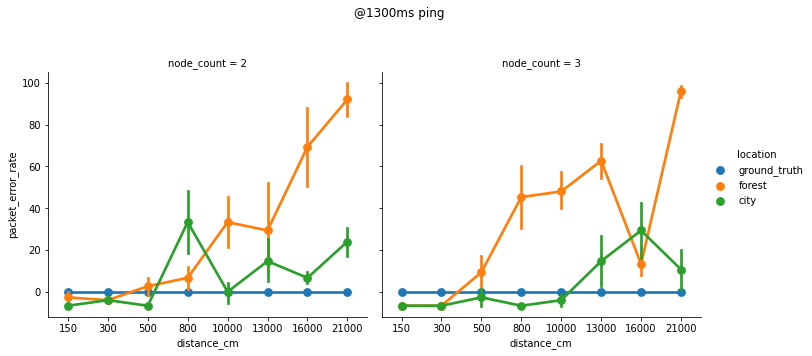

In [151]:
data_at_2100ping = data[data["ping_interval"] == 1300]
g = sns.catplot(x="distance_cm", y="packet_error_rate", hue="location", col="node_count", kind="point", ci=68, data=data_at_2100ping)
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle("@1300ms ping")